## Analysis of Unicorn Companies in the World

Unicorns are companies that have attained a financial valuation of at least 1 billion USD. Unicorns can provide insights into the level of performance of the domestic economy. 
In this analysis, an exploratory data analysis (EDA) is carried out to examine the overall status of unicorn companies . In this EDA, analysis of the number of years it took to ascertain unicorn status, the industry with the best return on investment, as well as the amount of funding received by industry was analysis. Also, countries with opportunities to ascertain unicorn status quickly was also identified.

The dataset used in this analysis is provided by Maven Analytics, in its Maven Unicorn Challenge https://raw.githubusercontent.com/kauvinlucas/maven-unicorn-challenge/main/data/Unicorn_Companies.csv

##### Importing the neccesary libraries

In [ ]:
# analysis packages
import pandas as pd
import os

# viz packages
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Path and Dataset

In [2]:
working_directory = os.getcwd()
path = working_directory + '/Unicorn_Companies.csv'
df = pd.read_csv(path)
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year to be a unicorn,Return on investment
0,Bytedance,180,07/04/2017,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23
1,SpaceX,100,01/12/2012,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14
2,SHEIN,100,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China...",10,50
3,Stripe,95,23/01/2014,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",4,48
4,Klarna,46,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita...",6,12
5,Canva,40,08/01/2018,Internet software & services,Surry Hills,Australia,Oceania,2012,1,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40
6,Checkout.com,40,02/05/2019,Fintech,London,United Kingdom,Europe,2012,2,"Tiger Global Management, Insight Partners, DST...",7,20
7,Instacart,39,30/12/2014,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,13
8,JUUL Labs,38,20/12/2017,Consumer & retail,San Francisco,United States,North America,2015,14,Tiger Global Management,2,3
9,Databricks,38,05/02/2019,Data management & analytics,San Francisco,United States,North America,2013,3,"Andreessen Horowitz, New Enterprise Associates...",6,13


#### There are currently 1074 Unicorn companies in the world

In [5]:
num_unicorn = len(set(df.Company))+1
num_unicorn

1074

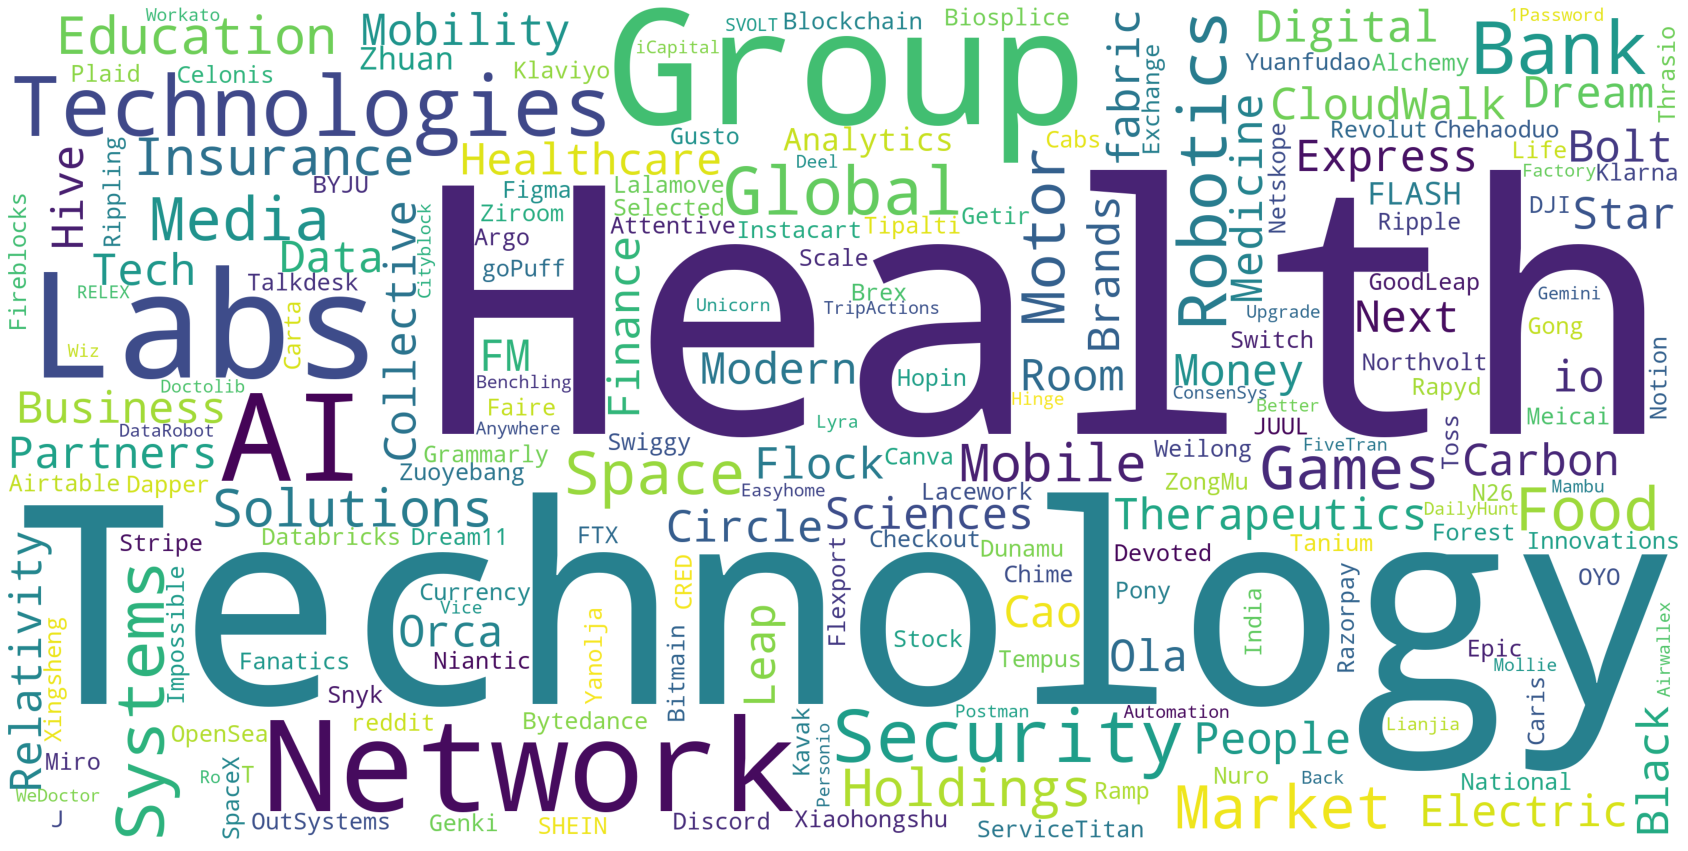

In [146]:
# overview of the unicorn company space

stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['Company'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 3000, height = 1500, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### Data pre-processing

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1074 non-null   object
 1   Valuation             1074 non-null   int64 
 2   Date Joined           1074 non-null   object
 3   Industry              1074 non-null   object
 4   City                  1058 non-null   object
 5   Country               1074 non-null   object
 6   Continent             1074 non-null   object
 7   Year Founded          1074 non-null   int64 
 8   Funding               1074 non-null   int64 
 9   Select Investors      1073 non-null   object
 10  Year to be a unicorn  1074 non-null   int64 
 11  Return on investment  1074 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 100.8+ KB


In [5]:
df.shape

(1074, 12)

In [3]:
# rename the columns for with space using underscore, for easy access

df.columns = df.columns.str.replace(' ', '_')
df['Date_Joined'] = pd.to_datetime(df['Date_Joined'])
df['year_joined'] = df['Date_Joined'].dt.year
df['month'] = df['Date_Joined'].apply(lambda x: x.strftime('%B'))
df.head(2)

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment,year_joined,month
0,Bytedance,180,2017-07-04,Artificial Intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",5,23,2017,July
1,SpaceX,100,2012-01-12,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,14,2012,January


In [21]:
import numpy as np

df['avg_return'] = np.where(df['Year_to_be_a_unicorn'] != 0, df['Return_on_investment']/df['Year_to_be_a_unicorn'],0)
av = df.sort_values(by='avg_return', ascending=False)[0:10]
av = pd.DataFrame(av)
av

,Company,Valuation,Date_Joined,Industry,City,Country,Continent,Year_Founded,Funding,Select_Investors,Year_to_be_a_unicorn,Return_on_investment,year_joined,month,avg_return
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",4,48,2014,January,12.000000
33,Brex,12,2018-05-10,Fintech,San Francisco,United States,North America,2017,1,"DST Global, Ribbit Capital, Greenoaks Capital ...",1,12,2018,May,12.000000
78,Hopin,8,2020-10-11,Internet software & services,London,United Kingdom,Europe,2019,1,"Accel, Northzone Ventures, Institutional Ventu...",1,8,2020,October,8.000000
94,Scale AI,7,2019-05-08,Artificial Intelligence,San Francisco,United States,North America,2018,1,"Accel, Y Combinator, Index Ventures",1,7,2019,May,7.000000
26,Devoted Health,13,2018-10-16,Health,Waltham,United States,North America,2017,2,"Andreessen Horowitz, F-Prime Capital, Venrock",1,7,2018,October,7.000000
5,Canva,40,2018-08-01,Internet software & services,Surry Hills,Australia,Oceania,2012,1,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40,2018,August,6.666667
17,Xiaohongshu,20,2016-03-31,E-commerce & direct-to-consumer,Shanghai,China,Asia,2013,1,"GGV Capital, ZhenFund, Tencent",3,20,2016,March,6.666667
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,13,2014,December,6.500000
31,Faire,12,2019-10-30,Artificial Intelligence,San Francisco,United States,North America,2017,1,"Khosla Ventures, Forerunner Ventures, Sequoia ...",2,12,2019,October,6.000000
127,Wiz,6,2021-03-17,Cybersecurity,Tel Aviv,Israel,Asia,2020,1,"Insight Partners, Sequoia Capital, Index Ventures",1,6,2021,March,6.000000


In [24]:
plt.bar(av.Company, av.avg_return)
plt.show()

<IPython.core.display.Javascript object>

In [20]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.barplot(x='Company', y='avg_return', data=av)
# set title of barplot
ax.set_title('Most Valuable Unicorn Companies in the World', fontsize=16)
ax.set_ylabel('Current Company Valuation')


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Current Company Valuation')

#### Most Valuable unicorn companies in the world based on current valuation

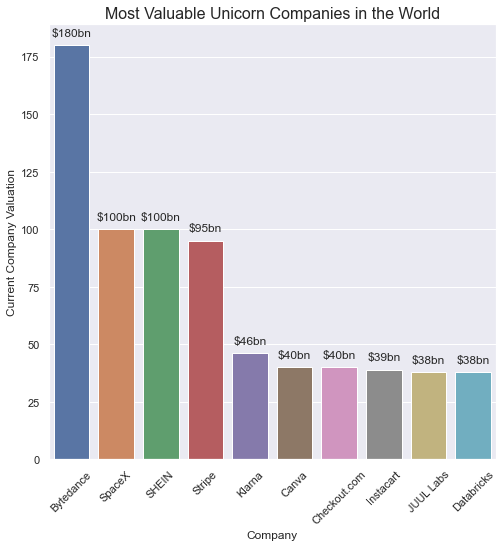

In [29]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.barplot(x='Company', y='Valuation', data=df[0:10])

# set title of barplot
ax.set_title('Most Valuable Unicorn Companies in the World', fontsize=16)
ax.set_ylabel('Current Company Valuation')
ax.set_xticklabels(df.Company[0:10],rotation=45)

# label for each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
           y= height+4,
            s = '${:.0f}bn'.format(height),
           ha='center')

### Analysis of unicorn companies by continent

In [162]:
# list of continents in the dataset

list(set(df.Continent))

['Asia', 'Africa', 'North America', 'Oceania', 'Europe', 'South America']

#### Number of unicorn companies by continent

In [18]:
# Number of unicorn companies by continent

continent = df.groupby('Continent').count()
continent = continent.sort_values(by='Company', ascending=False)
continent = pd.DataFrame(continent.Company).reset_index()
continent = continent.rename(columns={'Company':"No_of_Unicorn_companies_per_continent"}, inplace=False)
continent

,Continent,No_of_Unicorn_companies_per_continent
0,North America,589
1,Asia,310
2,Europe,143
3,South America,21
4,Oceania,8
5,Africa,3


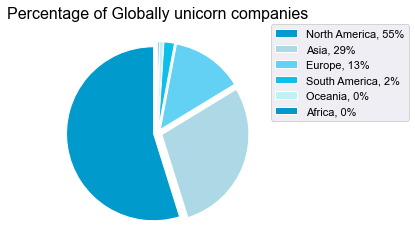

In [85]:
%matplotlib inline


plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=11
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC', '#ADD8E6']
plt.pie(continent.No_of_Unicorn_companies_per_continent,startangle=90, colors=color_palette_list, explode=[0.05]*6, pctdistance=0.5)
plt.title('Percentage of Globally unicorn companies', size=16)
plt.legend(['North America, 55%', 'Asia, 29%', 'Europe, 13%', 'South America, 2%', 'Oceania, 0%', 'Africa, 0%'], bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)

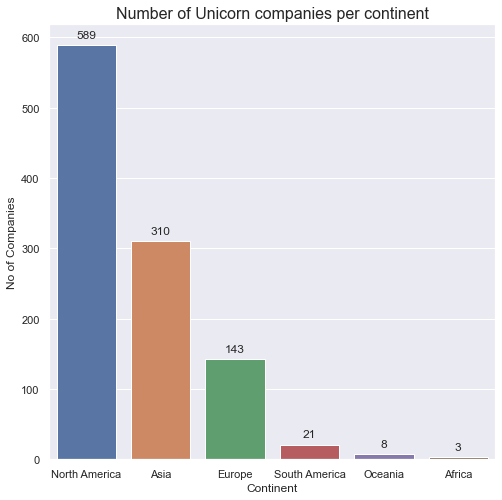

In [164]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.barplot(x='Continent', y='No of Unicorn companies per continent', data=continent)

# set title of barplot
ax.set_title('Number of Unicorn companies per continent', fontsize=16)
ax.set_ylabel('No of Companies')

# label for each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2,
           y= height+10,
            s = '{:.0f}'.format(height),
           ha='center')

#### Total Funding received $bn per continent

In [157]:
continent_funding = df.groupby('Continent').agg({'Funding': 'sum'})
continent_funding = continent_funding.sort_values(by='Funding', ascending=False)
continent_funding = pd.DataFrame(continent_funding.Funding).reset_index()
continent_funding = continent_funding.rename(columns={'Funding':"Total Funding received $bn per continent"}, inplace=False)
continent_funding

,Continent,Total Funding received $bn per continent
0,North America,252
1,Asia,182
2,Europe,93
3,South America,14
4,Africa,2
5,Oceania,2


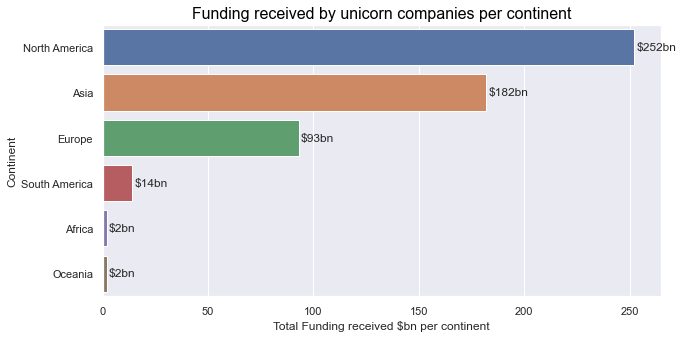

In [483]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
chart = sns.barplot(x='Total Funding received $bn per continent', y='Continent', data=continent_funding, orient='horizontal')

# set title of barplot
chart.set_title('Funding received by unicorn companies per continent', fontsize=16, color='black')
plot.set_ylabel('Continent')

# label each bar in barplot
for p in chart.patches:
    height = p.get_height()
    width = p.get_width()
    chart.text(x = width+1,
           y = p.get_y()+(height/2),
           s = '${:.0f}bn'.format(width),
           va = 'center')

##### Relationship between current valuation status and geographical location

Text(0.5, 0, 'Valuation in $bn')

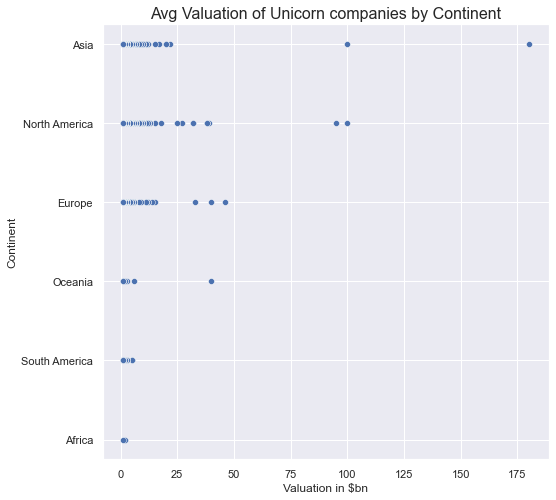

In [151]:
cont = sns.scatterplot(data = df, x = 'Valuation', y = 'Continent')
cont.set_title('Avg Valuation of Unicorn companies by Continent', fontsize=16)
cont.set_xlabel('Valuation in $bn')

##### Industries and No of Unicorns

In [13]:
list(set(df.Industry))

['Other',
 'Edtech',
 'Hardware',
 'Cybersecurity',
 'Artificial Intelligence',
 'Data management & analytics',
 'Internet software & services',
 'Travel',
 'E-commerce & direct-to-consumer',
 'Auto & transportation',
 'Fintech',
 'Supply chain, logistics, & delivery',
 'Consumer & retail',
 'Health',
 'Mobile & telecommunications']

In [177]:
# Industry classification of Unicorns

Industy_unicorn = df.groupby('Industry').count()
Industy_unicorn = Industy_unicorn.sort_values(by='Company', ascending=False)
Industy_unicorn = pd.DataFrame(Industy_unicorn.Company).reset_index()
Industy_unicorn = Industy_unicorn.rename(columns={'Company':"No of Unicorn Companies"}, inplace=False)
Industy_unicorn

,Industry,No of Unicorn Companies
0,Fintech,224
1,Internet software & services,205
2,E-commerce & direct-to-consumer,111
3,Artificial Intelligence,84
4,Health,74
5,Other,58
6,"Supply chain, logistics, & delivery",57
7,Cybersecurity,50
8,Data management & analytics,41
9,Mobile & telecommunications,38


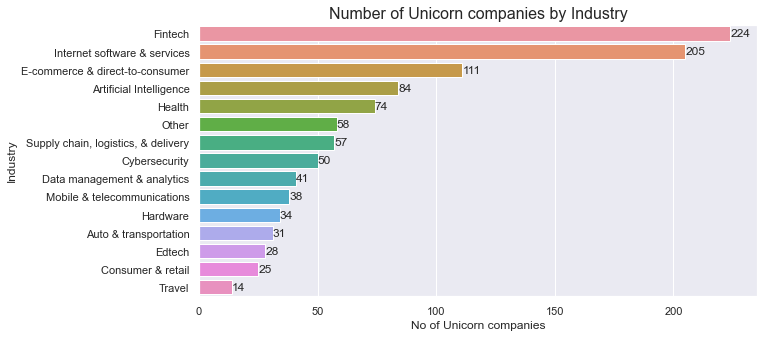

In [484]:
# Graphical illustration

ax2 = sns.barplot(data = Industy_unicorn, x='No of Unicorn Companies', y= 'Industry')
ax2.set_title('Number of Unicorn companies by Industry', size=16)
ax2.set_xlabel('No of Unicorn companies')

# label for each bar
for container in ax2.containers:
    ax2.bar_label(container)


##### Analyse the industry with the fastest chance to become a Unicorn as well as the associated return on investment

In [213]:
# calculating the years it takes to becoming a unicorn per sector and corresponding returns

Years_unicorn = df.groupby('Industry').mean()
Years_unicorn = Years_unicorn.sort_values(by='Year_to_be_a_unicorn', ascending=True)
Years_unicorn = Years_unicorn.iloc[:,3:5]
Years_unicorn = pd.DataFrame(Years_unicorn).reset_index()
Years_unicorn

,Industry,Year_to_be_a_unicorn,Return_on_investment
0,Auto & transportation,5.032258,1.903226
1,Artificial Intelligence,5.892857,1.464286
2,Hardware,5.941176,1.529412
3,Mobile & telecommunications,6.315789,1.184211
4,E-commerce & direct-to-consumer,6.432432,2.018018
5,Fintech,6.544643,2.098214
6,Travel,6.571429,2.357143
7,Cybersecurity,6.800000,1.700000
8,"Supply chain, logistics, & delivery",6.929825,1.421053
9,Edtech,7.714286,1.500000


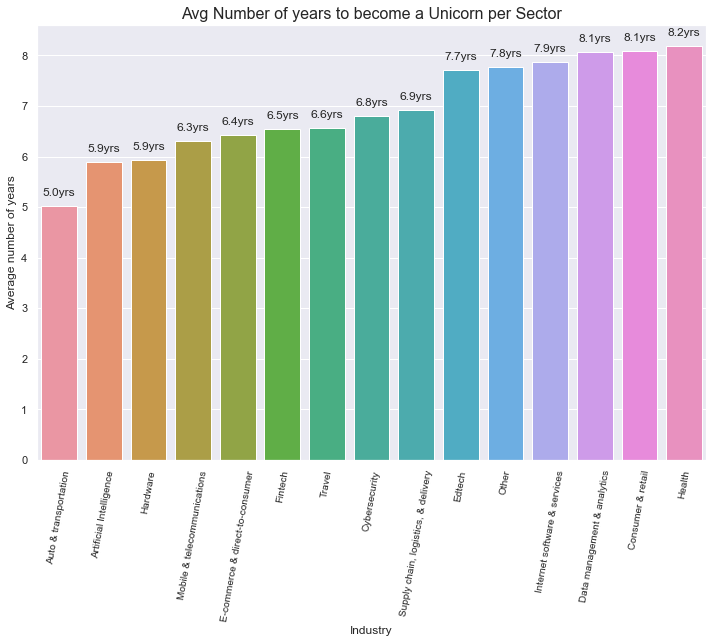

In [249]:
# Graphical illustration
sns.set(rc={'figure.figsize':(12,8)})

sec = sns.barplot(data = Years_unicorn, x='Industry', y='Year_to_be_a_unicorn')
plt.title('Avg Number of years to become a Unicorn per Sector', size=16)
plt.xlabel('Industry')
plt.ylabel('Average number of years')
plt.xticks(rotation=80, size=10)



# label for each bar
for p in sec.patches:
    height = p.get_height()
    sec.text(x = p.get_x() + p.get_width()/2,
           y= height+0.2,
            s = '{:.1f}yrs'.format(height),
           ha='center')


##### Investment  returns by number of years used to attain unicorn status

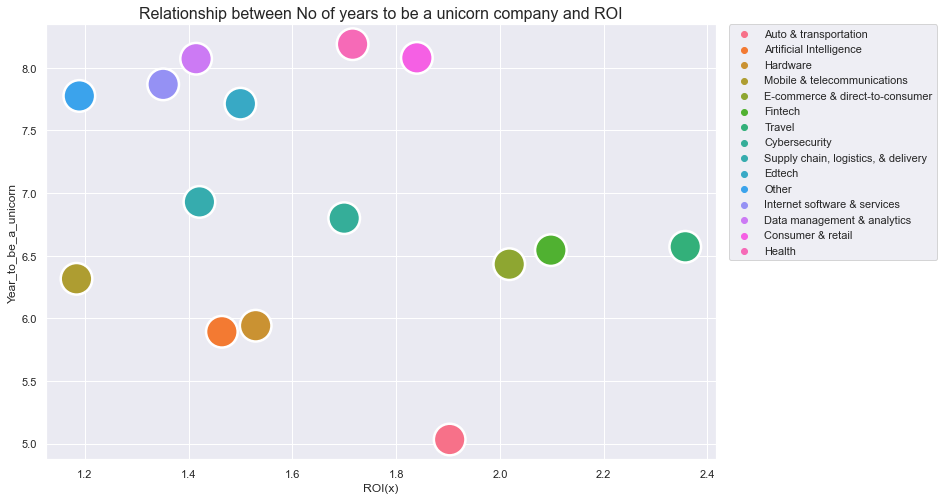

In [496]:
sns.set(rc={'figure.figsize':(12,8)})

ROI = sns.scatterplot(data = Years_unicorn, 
                      x = 'Return_on_investment', 
                      y = 'Year_to_be_a_unicorn', 
                      hue='Industry', 
                      s=1000, 
                      c='coral')
ROI.set_title('Relationship between No of years to be a unicorn company and ROI', fontsize=16)
ROI.set_xlabel('ROI(x)')
ROI.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)

##### ROI by Industry

In [498]:
ROI_sector = df.groupby('Industry').mean().round(2)
ROI_sector = ROI_sector.sort_values(by='Return_on_investment', ascending=False)
ROI_sector = ROI_sector.iloc[:,4]
ROI_sector = pd.DataFrame(ROI_sector).reset_index()
ROI_sector = ROI_sector.rename(columns={'Return_on_investment':'ROI(x)'})
ROI_sector

,Industry,ROI(x)
0,Travel,2.36
1,Fintech,2.10
2,E-commerce & direct-to-consumer,2.02
3,Auto & transportation,1.90
4,Consumer & retail,1.84
5,Health,1.72
6,Cybersecurity,1.70
7,Hardware,1.53
8,Edtech,1.50
9,Artificial Intelligence,1.46


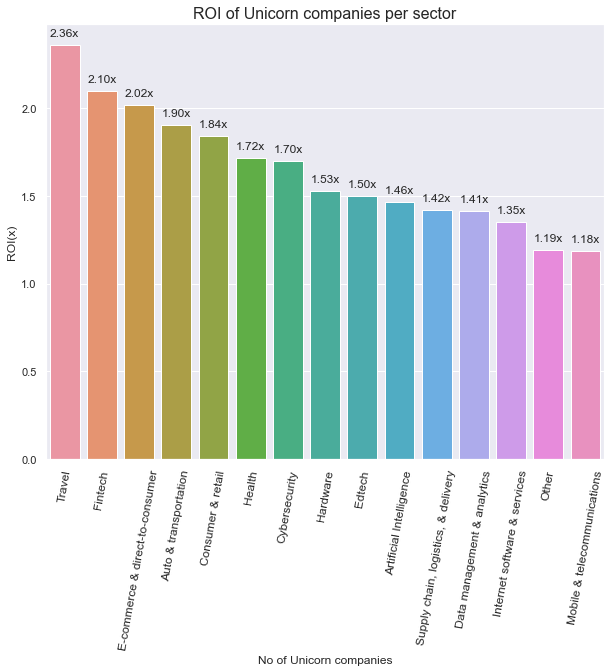

In [472]:
# Graphical illustration

ax3 = sns.barplot(data = ROI_sector, x='Industry', y= 'ROI(x)')
ax3.set_title('ROI of Unicorn companies per sector', size=16)
ax3.set_xlabel('No of Unicorn companies')
plt.xticks(rotation=80, size=12)

# label for each bar
for p in ax3.patches:
    height = p.get_height()
    ax3.text(x = p.get_x() + p.get_width()/2,
           y= height+0.05,
            s = '{:.2f}x'.format(height),
           ha='center')



#### Country Unicorn Analysis

In [217]:
### no of countries that have Unicorns

len(list(set(df.Country)))

46

In [224]:
country_unicorn = df.groupby('Country').count()
country_unicorn = country_unicorn.sort_values(by='Valuation', ascending=False)
country_unicorn = pd.DataFrame(country_unicorn.Company).reset_index()
country_unicorn = country_unicorn.rename(columns={'Company':"No of Unicorn Companies"}, inplace=False)
country_unicorn

,Country,No of Unicorn Companies
0,United States,562
1,China,173
2,India,65
3,United Kingdom,43
4,Germany,26
5,France,24
6,Israel,20
7,Canada,19
8,Brazil,16
9,South Korea,12


In [263]:
# Average Valuation figures $bn per country

country_unicorns = df.groupby('Country').mean('Valuation')
country_unicorns = country_unicorns.sort_values('Valuation', ascending=False)
country_unicorns = country_unicorns.reset_index()
country_unicorns = country_unicorns.round(1)
country_unicorns = country_unicorns.iloc[:,[0,1,3,4,5]]
country_unicorns

,Country,Valuation,Funding,Year_to_be_a_unicorn,Return_on_investment
0,Bahamas,32.0,2.0,3.0,16.0
1,Sweden,10.5,1.8,6.0,3.2
2,Australia,7.0,0.2,7.9,5.8
3,Estonia,6.5,0.5,6.0,5.5
4,Turkey,5.3,1.0,6.0,3.0
5,Lithuania,5.0,1.0,11.0,5.0
6,Indonesia,4.7,1.0,5.5,1.2
7,United Kingdom,4.5,0.7,7.9,2.5
8,China,4.0,0.6,5.8,1.8
9,Denmark,3.5,0.0,6.0,0.0


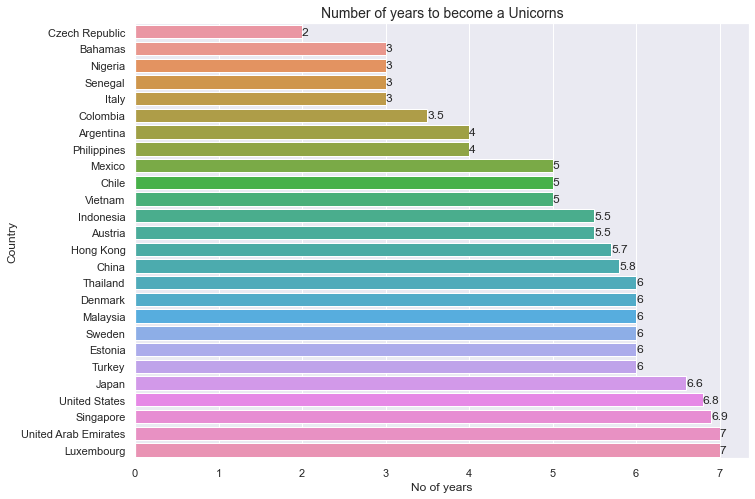

In [285]:
unicorn_yr = country_unicorns.sort_values(by='Year_to_be_a_unicorn', ascending=True)[0:26]

# bar chart
unicorn_years = sns.barplot(data=unicorn_yr , x='Year_to_be_a_unicorn', y='Country')
plt.title('Number of years to become a Unicorns', size=14)
plt.xlabel('No of years')

#define plot size for all plots
plt.rcParams['figure.figsize'] = [11, 8]

# label for each bar
for container in unicorn_years.containers:
    unicorn_years.bar_label(container)
    
plt.show()

##### Total Unicorn funding received by country in $'bn

In [292]:
# Total funding received by countries

country_funding = df.groupby('Country').sum('Funding').round(2)
country_funding = pd.DataFrame(country_funding.Funding)
country_funding = country_funding.sort_values(by='Funding', ascending=False)
country_funding = country_funding.rename(columns={'Funding':"Total funding received in $bn"}).reset_index()
country_funding

,Country,Total funding received in $bn
0,United States,242
1,China,106
2,India,47
3,United Kingdom,30
4,Germany,17
5,France,14
6,Sweden,11
7,Brazil,11
8,Ireland,9
9,Singapore,6


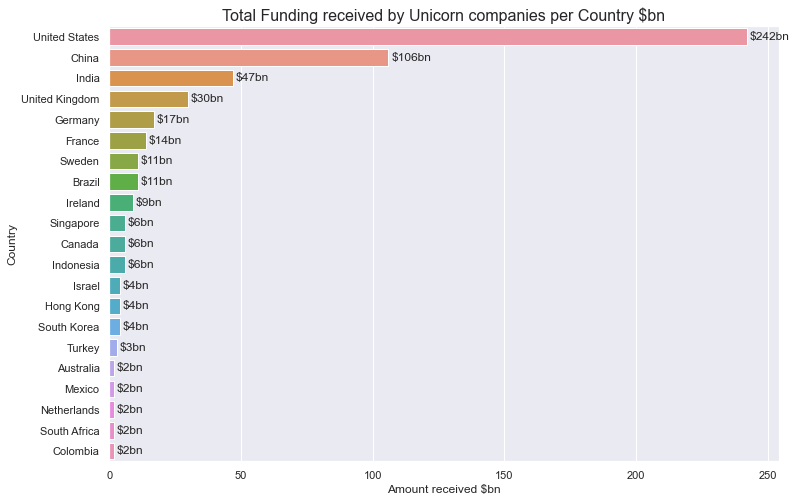

In [371]:
sns.set(rc={'figure.figsize':(12,8)})

# bar chart
f = sns.barplot(x ='Total funding received in $bn', y= 'Country', data=country_funding[0:21])
plt.title('Total Funding received by Unicorn companies per Country $bn', size=16)
plt.xlabel('Amount received $bn')

# label each bar in barplot
for p in f.patches:
    height = p.get_height()
    width = p.get_width()
    f.text(x = width+1,
           y = p.get_y()+(height/2),
           s = '${:.0f}bn'.format(width),
           va = 'center')
    
#define plot size for all plots
plt.rcParams['figure.figsize'] = [6.4, 7]

plt.show()

#### Number of companies that attain unicorn status per annum

In [354]:
joined_unicorn = df.groupby('year_joined').count()
joined_unicorn = pd.DataFrame(joined_unicorn.Company).reset_index()
joined_unicorn = joined_unicorn.rename(columns={'Company':'No of companies that became unicorn'})
joined_unicorn

,year_joined,No of companies that became unicorn
0,2007,1
1,2011,2
2,2012,4
3,2013,3
4,2014,13
5,2015,35
6,2016,21
7,2017,44
8,2018,103
9,2019,104


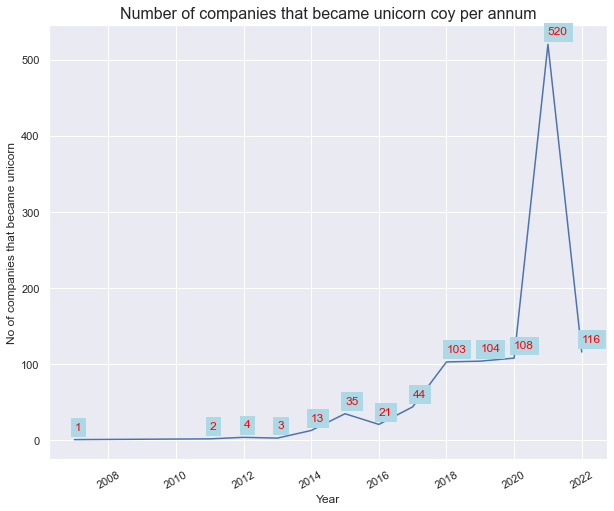

In [390]:
sns.set(rc={'figure.figsize':(10,8)})

n = sns.lineplot(data=joined_unicorn, x='year_joined', y='No of companies that became unicorn')

plt.title('Number of companies that became unicorn coy per annum', size=16)
plt.xlabel('Year')
plt.xticks(rotation=30)

# label points on the plot
for x, y in zip(joined_unicorn['year_joined'], joined_unicorn['No of companies that became unicorn']):
    plt.text(x = x,
             y = y+10,
             s = '{:.0f}'.format(y),
             va = 'bottom',
             color = 'red').set_backgroundcolor('#add8e6')

In [475]:
data1 = df.pivot_table(index="month", columns="Year_Founded", values="Funding", aggfunc='sum')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October' , 'November', 'December']

data1 = data1.reindex(months)
data1 = data1.fillna(0).astype(int)

#### HeatMap of funds raised by Unicorn companies

Text(0.5, 48.5, 'Year fund was raised')

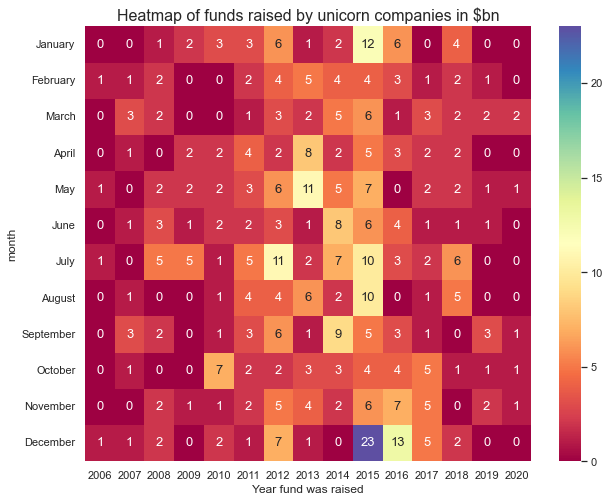

In [463]:
# heatmap from 2006 through 2020, excluding periods before 2006

hmp = sns.heatmap(data1.iloc[:, -16:-1],
                 annot=True, 
                  fmt="d",
                  annot_kws={"size":13},
                 cmap="Spectral")

hmp.set_title('Heatmap of funds raised by unicorn companies in $bn', 
              fontsize=16)

hmp.set_xlabel('Year fund was raised')

##### Countries with the best ROI

In [108]:
country_ROI = df.groupby('Country').mean('Return_on_investment').round(2)
country_ROI = pd.DataFrame(country_ROI.Return_on_investment)
country_ROI = country_ROI.sort_values(by='Return_on_investment',
                                      ascending=False).reset_index()
country_ROI

,Country,Return_on_investment
0,Bahamas,16.00
1,Australia,5.75
2,Estonia,5.50
3,Lithuania,5.00
4,Austria,3.50
5,Sweden,3.17
6,Turkey,3.00
7,United Kingdom,2.51
8,Argentina,2.00
9,Nigeria,2.00


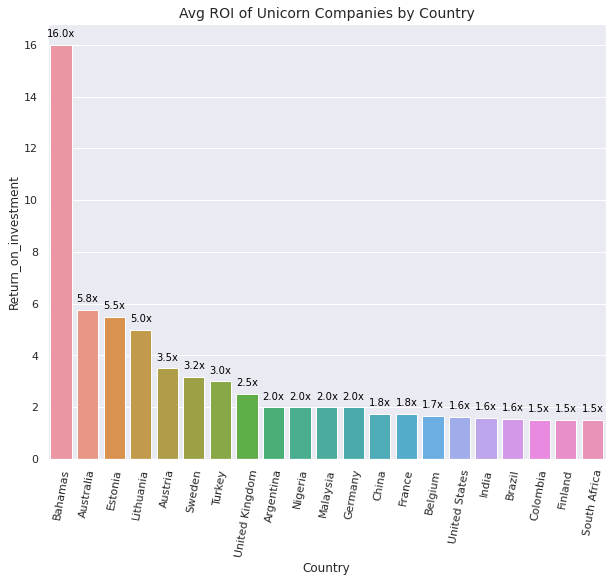

In [109]:
sns.set(rc={'figure.figsize':(10,8)})

# bar chart
r = sns.barplot(data=country_ROI[0:21],y='Return_on_investment',x='Country')
plt.title('Avg ROI of Unicorn Companies by Country', size=14)
plt.xlabel('Country')
plt.xticks(rotation=80)
plt.rcdefaults()

# label for each bar
for p in r.patches:
    height = p.get_height()
    r.text(x = p.get_x() + p.get_width()/2,
           y= height+0.3,
            s = '{:.1f}x'.format(height),
           ha='center')

    
plt.show()

##### Unicorn company analysis by city

In [337]:
### number of cities with atleast a Unicorn company

len(list(set(df.City)))

257

In [123]:
total_funding_by_city = city_funding['Funding_by_city_$bn'].sum()

In [122]:
# Total funding received by cities in $bn
total_funding_by_city

536

In [127]:
city_funding = df.groupby('City').sum('Funding')
city_funding = city_funding.sort_values('Funding', ascending=False)
city_funding = pd.DataFrame(city_funding.Funding).reset_index()
city_funding = city_funding.rename(columns={'Funding':'Funding_by_city_$bn'})
city_funding['Percent_of_total'] = ((city_funding['Funding_by_city_$bn']/
                           city_funding['Funding_by_city_$bn'].sum()) * 100).round(2)
city_funding

,City,Funding_by_city_$bn,Percent_of_total
0,San Francisco,70,13.06
1,Beijing,48,8.96
2,New York,29,5.41
3,London,27,5.04
4,Bengaluru,27,5.04
...,...,...,...
251,Jeju-do,0,0.00
252,Jerusalem,0,0.00
253,Kowloon,0,0.00
254,La Plaine Saint-Denis,0,0.00


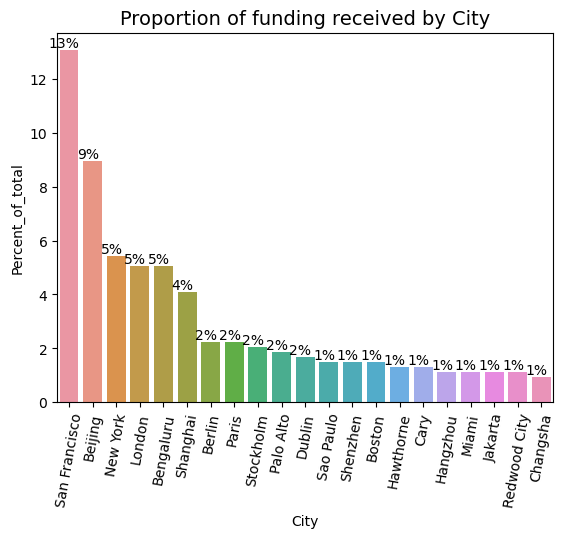

In [247]:

# bar chart
city = sns.barplot(data=city_funding[0:21],y='Percent_of_total',x='City')
plt.title('Proportion of funding received by City', size=14)
plt.xlabel('City')
plt.xticks(rotation=80)
plt.rcdefaults()

# label for each bar
for p in city.patches:
    height = p.get_height()
    city.text(x = p.get_x() + p.get_width()/4,
           y= height+0.1,
            s = '{:.0f}%'.format(height),
           ha='center')

    
plt.show()

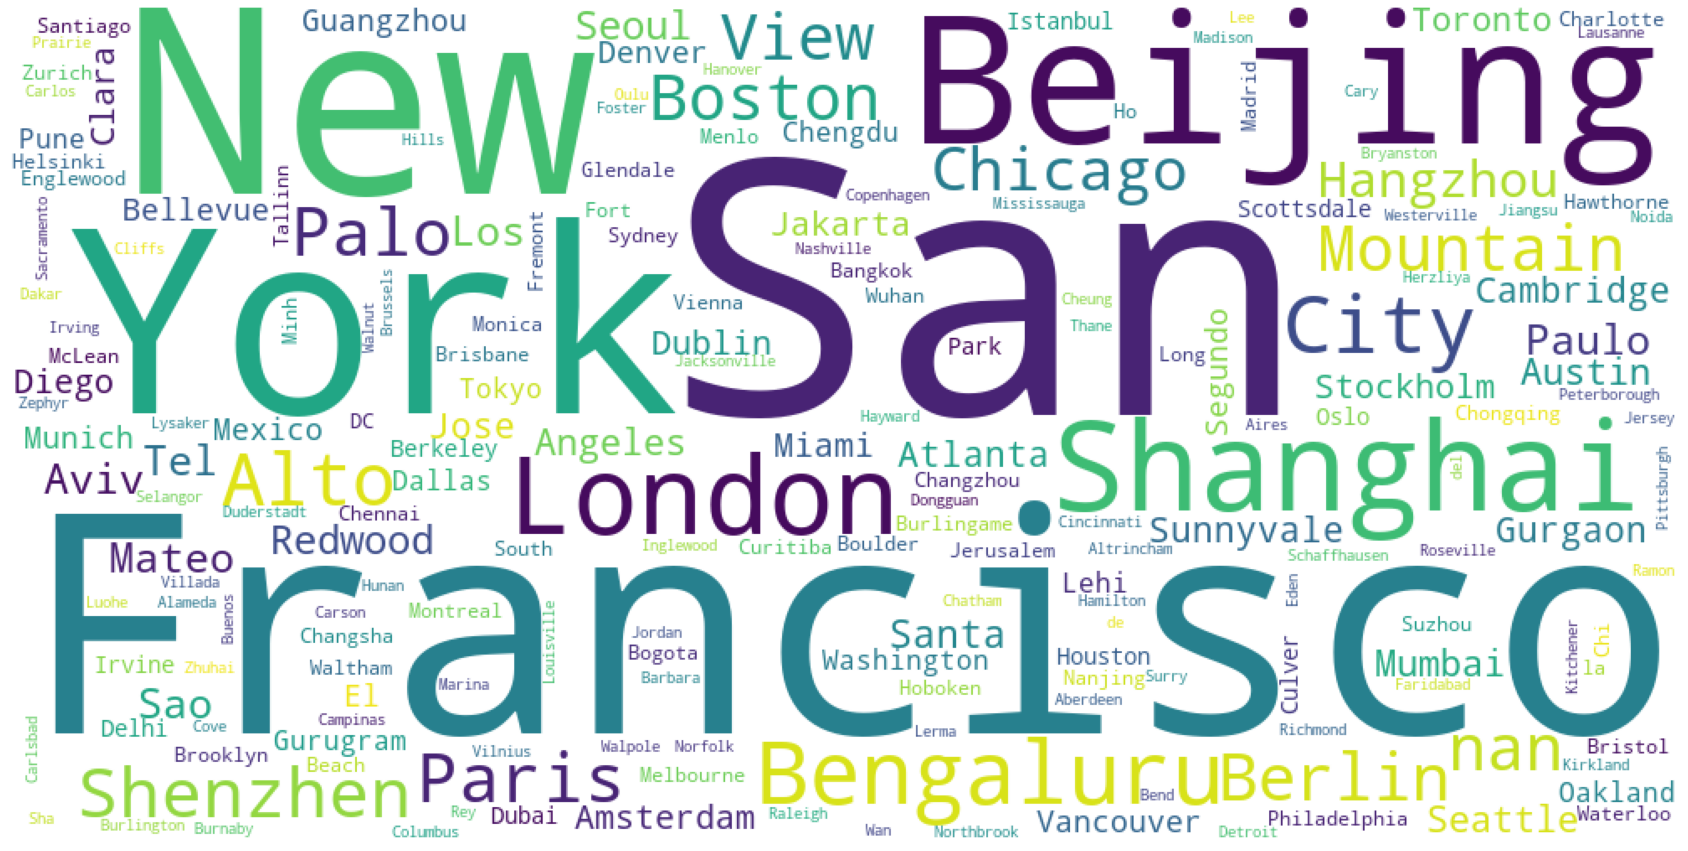

In [338]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['City'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

##### Investor Analysis in Unicorn funding

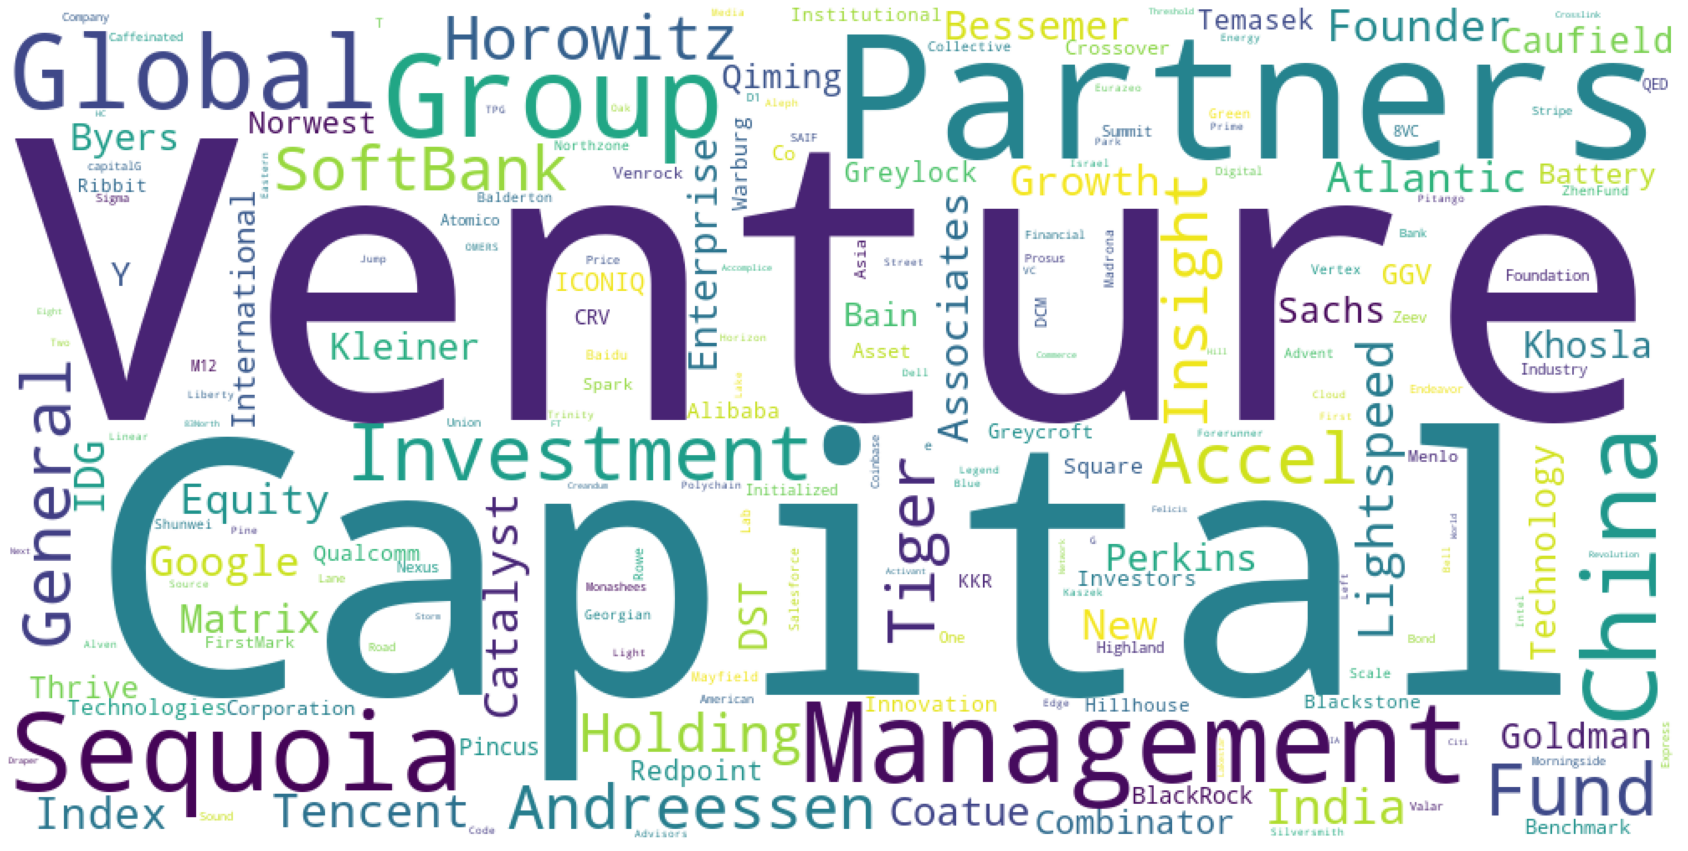

In [335]:
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['Select_Investors'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

...till we meet again, for comments, suggestions and further areas of improvement.

#### LinkedIn: Adeoti Sheriffdeen
#### Twitter: @SheriffHolla
#### contact me at s.adeoti86@gmail.com